# Customer Data Pre-processing

**Exercise 1: Read in the provided ACW Data using the CSV library.**

In [1]:
#Import the CSV module for handling CSV files
import csv

**Exercise 2:Convert all flat structures into nested structures.**

In [2]:
#Create empty lists to store the header information
header=[]

#Create an empty list to store the nested values 
nested_list=[]

# Open the CSV file with context manager for automatic closing
with open ("acw_user_data.csv", "r") as acw_file:
    acw_read=csv.DictReader(acw_file)
    acw_data=[line for line in acw_read]
    
# Extract header information from the first line
    for line_number, line in enumerate(acw_data):
            if line_number==0: 
                header.extend(line)     
                print (header)
                
 # A Function to convert flat data to nested structures   
    def convert_to_nested_structures(acw_data):
       
        """
        This function converts flat data from a CSV file to a list of dictionaries with nested structures.

        It recieves a list of dictionaries containing flat data from each line of the CSV file.

        It returns a list of dictionaries with unnested and nested structures like Vehicle, Address, and Credit Card.
        """
        for line in acw_data:
            try:
               #nest all the keys and values related to vehicle
                vehicle_data= {
                        "make":line['Vehicle Make'],
                        'model':line['Vehicle Model'],
                        'year':int(line['Vehicle Year']),
                        'type':line['Vehicle Type']
                }
                #nest all the address keys and values
                address_data={
                    'street':line['Address Street'],
                    'city':line['Address City'],
                    'postcode':line['Address Postcode']
                }
                #nest all the credit card keys and values
                card_data={
                    'start_date':line['Credit Card Start Date'],
                    'expiry_date':line['Credit Card Expiry Date'],
                    'number':int(line['Credit Card Number']),
                    "cvv" :int(line['Credit Card CVV']),
                    "iban":line["Bank IBAN"]
                }
                #nest the rest of the columns in the data
                unnested_columns={
                    'first_name':line['First Name'],
                    'last_name':line['Last Name'],
                    'age':int(line['Age (Years)']),
                    'sex':line["Sex"],
                    'retired':line["Retired"],
                    'marital_status':line['Marital Status'],
                    'dependants':line['Dependants'],
                    'salary':int(line['Yearly Salary (GBP)']),
                    'pension':int(line[ 'Yearly Pension (GBP)']),
                    'company':line['Employer Company'],
                    'commute_distance':float(line['Distance Commuted to Work (Km)'])
                }
                #append the nested columns to the 
                unnested_columns.update({ 
                            'Vehicle':vehicle_data,
                             'Credit card':card_data,
                             'Address': address_data
                })

                nested_list.append(unnested_columns)
                
            # Handle missing fields, data type issues, unexpected errors
            except TypeError as e:
                print(f"Error at line {line_number + 1}: {e} in data format.")
            except ValueError as e:
                print(f"Error at line {line_number + 1}: {e} in data format.")    
            except Exception as e:
                print(f"Unexpected error at line {line_number + 1}: {e}")    
        
        #return the list consiting of the nested and unnested columns 
        return(nested_list)
    
#Give the function a variable name for easy calling
nested_data=convert_to_nested_structures(acw_data)

# print the new data of nested and unnested structures
print(nested_data)

['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']
[{'first_name': 'Kieran', 'last_name': 'Wilson', 'age': 89, 'sex': 'Male', 'retired': 'True', 'marital_status': 'married or civil partner', 'dependants': '3', 'salary': 72838, 'pension': 7257, 'company': 'N/A', 'commute_distance': 0.0, 'Vehicle': {'make': 'Hyundai', 'model': 'Bonneville', 'year': 2009, 'type': 'Pickup'}, 'Credit card': {'start_date': '08/18', 'expiry_date': '11/27', 'number': 676373692463, 'cvv': 875, 'iban': 'GB62PQKB71416034141571'}, 'Address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}}, {'first_name': 'Jonathan', 'last_name

**Exercise 3: Find empty or whitespace entries in the "Dependants" column and print a list where all such error corrections take place.**

In [3]:
def handle_empty_dependant(data):
    """
    This function finds and replaces empty or whitespace values in the Dependants column

    It recieves a list of dictionaries containing flat data from each line of the CSV file.

    It returns a list of the indexes with empty strings.
    """
    #initialise a list to store the index of empty or whitespace values
    empty_dependent_indexes=[]
    for index, line in enumerate(data):
        try:
            #Check for empty or whitespace values in the dependant column
            if line["dependants"] == "" or line["dependants"] == " ":
                empty_dependent_indexes.append(index)  # Append the index to the empty dependent list   
                
                #Replace all empty or white space entries with 0. 
                #Rationale: All customers have dependants which seems unlikely. 
                #The assumption is those with empty strings have no dependants
                line["dependants"] = 0
                
        #Check missing dependant column error        
        except KeyError:
            print(f"Error at index {index}: 'dependants' column not found.") 
            
    #returns the list of all the indexes    
    return(f"Problematic rows for dependants:, {empty_dependent_indexes}")
handle_empty_dependant(nested_data)  

'Problematic rows for dependants:, [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]'

**Exercise 4: Write all records to a processed.json file in the JSON data format.**

In [4]:
#import JSON module to read and write JSON files
import json

# Open the processed JSON file in write mode with context manager for automatic closing
with open('processed.json', mode='w') as json_file:
    try:
        json.dump(nested_data, json_file) #write the nested data to the JSON file 
    
    #check for missing file error or any unexpected error
    except FileNotFoundError:
        print("The specified file was not found")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

**Exercise 5: Create two additional file outputs, retired.json and employed.json,
these should contain all retired customers and all employed customers.**

In [5]:
#filters the data  for employed custmers by finding rows that have company names and cummuted distance. 
employed_data= [line for line in nested_data if line['company'] != 'N/A']
print(employed_data)

#Open the employed JSON file in write mode with context manager for automatic closing
with open('employed.json', mode='w') as employed_file:
    try:
        json.dump(employed_data, employed_file) #write the employed data to the JSON file 
    
    #check for missing file error or any unexpected error
    except FileNotFoundError:
        print("The specified file was not found")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

[{'first_name': 'Jonathan', 'last_name': 'Thomas', 'age': 46, 'sex': 'Male', 'retired': 'False', 'marital_status': 'married or civil partner', 'dependants': '1', 'salary': 54016, 'pension': 0, 'company': 'Begum-Williams', 'commute_distance': 13.72, 'Vehicle': {'make': 'Nissan', 'model': 'ATS', 'year': 1996, 'type': 'Coupe'}, 'Credit card': {'start_date': '08/12', 'expiry_date': '11/26', 'number': 4529436854129855, 'cvv': 583, 'iban': 'GB37UMCO54540228728019'}, 'Address': {'street': '00 Wheeler wells', 'city': 'Chapmanton', 'postcode': 'L2 7BT'}}, {'first_name': 'Antony', 'last_name': 'Jones', 'age': 22, 'sex': 'Male', 'retired': 'False', 'marital_status': 'married or civil partner', 'dependants': '1', 'salary': 68049, 'pension': 0, 'company': 'Hill-Wright', 'commute_distance': 16.02, 'Vehicle': {'make': 'GMC', 'model': 'Achieva', 'year': 2015, 'type': 'Convertible, Coupe'}, 'Credit card': {'start_date': '11/19', 'expiry_date': '07/27', 'number': 4091726363083888495, 'cvv': 422, 'iban':

In [6]:
#Filters the data for retired customers by finding rows where retired is True
retired_data= [line for line in nested_data if line['retired'] == "True" ]
print(retired_data)

#Open the retired employed JSON file in write mode with context manager for automatic closing
with open('retired.json', mode='w') as retired_file:
    try:
        json.dump(retired_data, retired_file)  #write the retired data to the JSON file 
    
    #check for missing file error or any unexpected error
    except FileNotFoundError:
        print("The specified file was not found")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

[{'first_name': 'Kieran', 'last_name': 'Wilson', 'age': 89, 'sex': 'Male', 'retired': 'True', 'marital_status': 'married or civil partner', 'dependants': '3', 'salary': 72838, 'pension': 7257, 'company': 'N/A', 'commute_distance': 0.0, 'Vehicle': {'make': 'Hyundai', 'model': 'Bonneville', 'year': 2009, 'type': 'Pickup'}, 'Credit card': {'start_date': '08/18', 'expiry_date': '11/27', 'number': 676373692463, 'cvv': 875, 'iban': 'GB62PQKB71416034141571'}, 'Address': {'street': '70 Lydia isle', 'city': 'Lake Conor', 'postcode': 'S71 7XZ'}}, {'first_name': 'Clive', 'last_name': 'Evans', 'age': 67, 'sex': 'Male', 'retired': 'True', 'marital_status': 'single', 'dependants': '1', 'salary': 27964, 'pension': 28075, 'company': 'N/A', 'commute_distance': 0.0, 'Vehicle': {'make': 'Volvo', 'model': 'Express 3500 Passenger', 'year': 2013, 'type': 'SUV'}, 'Credit card': {'start_date': '07/15', 'expiry_date': '04/27', 'number': 213199489183130, 'cvv': 389, 'iban': 'GB04VSAZ69128049616822'}, 'Address':

**Exercise 6: Write a function to flag cards with more than 10 years validity and remove customers with those cards from the CSV data. write the removed cards to a removed_ccard JSON FILE** 

In [7]:
#Import the datetime module to convert values to date format
from datetime import datetime

def flag_card(data_list):
    """
    This function flags cards with a validity period of more than 10 years.
    
    It recieves a list of dictionaries representing customer data.
    
    and returns True if the card has a validity period greater than 10 years, False otherwise.
    """
    for row in data_list:
        try:
            start_date=datetime.strptime(row['Credit Card Start Date'], '%m/%y').date() #convert the start_data values to date format
            expiry_date=datetime.strptime(row['Credit Card Expiry Date'], '%m/%y').date()#convert the expiry_date values to date format

            # Calculate the validity period of the card
            card_validity = (expiry_date.year-start_date.year)*12 +(expiry_date.month-start_date.month)
            
            #check if the validity of the card is more than 10 years (120 months)
            if card_validity > 120:    
                return True #returns true if the card validity is more than 10 years
            
        # Handle missing fields, data type issues, unexpected errors
        except KeyError as e:
            print(f"KeyError: {e} Required key not found in the row.")
        except ValueError as e:
            print(f"ValueError: {e} Error in value format.")
        except TypeError as e:
            print(f"TypeError: {e} Unexpected data type.")
        except Exception as e:
            print(f"Unexpected error: {e}") 
    
    #returns false if the card validity is less than 10 years
    return False

In [8]:
def remove_card(data):
    """
    This function removes cards with a validity period of more than 10 years.

    It recieves a list of dictionaries representing customer data.

    It returns a list of dictionaries where the cards are more than 10 years
    """
    #initialize an empty list to store the records where the card validity is more than 10 years
    flagged_cards = []

    for row in data:
        try:
            if flag_card([row]): #calls the flag_card function for each row
                flagged_cards.append(row) #if True, the row is appended to the flagged_card list
            if not flagged_cards:
                print('No cards to remove')#If False, it prints No card to remove.
    
         # Handle missing fields, data type issues, unexpected errors
        except KeyError as e:
            print(f"KeyError: {e} Required key not found in the row.")
        except ValueError as e:
            print(f"ValueError: {e} Error in value format.")
        except TypeError as e:
            print(f"TypeError: {e} Unexpected data type.")
        except Exception as e:
            print(f"Unexpected error: {e}")

    #returns a list of all cusstomers with card validity of above 10 years   
    return flagged_cards

removed_cards = remove_card(acw_data) #call the function for the customer data
print(removed_cards)

No cards to remove
[{'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT', 'Age (Years)': '46', 'Distance Commuted to Work (Km)': '13.72', 'Employer Company': 'Begum-Williams', 'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': '4529436854129855', 'Credit Card CVV': '583', 'Dependants': '1', 'First Name': 'Jonathan', 'Bank IBAN': 'GB37UMCO54540228728019', 'Last Name': 'Thomas', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '0', 'Retired': 'False', 'Yearly Salary (GBP)': '54016', 'Sex': 'Male', 'Vehicle Make': 'Nissan', 'Vehicle Model': 'ATS', 'Vehicle Year': '1996', 'Vehicle Type': 'Coupe'}, {'Address Street': '24 Heather locks', 'Address City': 'New Mathew', 'Address Postcode': 'WD10 1LX', 'Age (Years)': '43', 'Distance Commuted to Work (Km)': '20.05', 'Employer Company': 'Clark Group', 'Credit Card Start Date': '07/12', 'Credit Card Expiry Date': '03/29', 'Credit Card Number'

In [9]:
#Open the remove_ccard JSON file in write mode with context manager for automatic closing
with open('remove_ccard.json', mode='w') as rccard_file: 
    try:
        json.dump(removed_cards, rccard_file) #write the removed card data to the JSON file
    
    #check for missing file error or any unexpected error
    except FileNotFoundError:
        print("The specified file was not found")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

**Exercise 7: Create a new data attribute “Salary-Commute" by calculating the Salary that a customer earns, per mile of their commute. Write the new metric to a commute JSON file.**

In [10]:
# Open the JSON file with context manager for automatic closing
with open('processed.json', mode='r') as json_file:
    try:
        processed_data= json.load(json_file)
    except FileNotFoundError:
        print("Error: The specified file was not found.")
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON data: {e}")
    except Exception as e:
        print(f"Unexpected error: {e}")
    
    def create_commute (data):
        """
        This function calculate salary per mile based on salary and commute distance.

        It recieves a list of dictionaries representing processed data.

        and returns a list of calculated salary per mile values.
        """
        
        salary_commute=[]
        for row in data:
            try:    
                #Extract salary and commute distance from the row
                yearly_salary=row['salary']
                commute=row['commute_distance']
                
                #Calculate salary per mile, handling zero commute distance
                if commute<=1:
                    salary_per_mile=yearly_salary
                else:
                    salary_per_mile=yearly_salary/commute
                    
                 #Round the result and append to the list
                salary_commute.append(round(salary_per_mile, 2))
                
            #Check error for cases where commute distance value is 0
            except ZeroDivisionError:
                print("You cannot divide by Zero")
                
        # Return a sorted list of calculated salary per mile values
        return sorted(salary_commute)
    
## Create a list of salary per mile values based on processed data    
commute_list=create_commute (processed_data)
print(commute_list)

[3088.04, 3090.07, 3090.5, 3090.93, 3094.07, 3094.32, 3097.08, 3097.56, 3097.92, 3098.97, 3099.14, 3100.17, 3101.2, 3105.39, 3105.91, 3106.22, 3109.06, 3109.87, 3114.17, 3114.26, 3116.86, 3117.96, 3120.03, 3124.92, 3128.03, 3128.91, 3130.02, 3132.71, 3134.98, 3136.2, 3138.5, 3141.57, 3141.69, 3144.14, 3144.73, 3145.56, 3146.94, 3148.66, 3152.44, 3156.55, 3161.13, 3162.03, 3163.91, 3166.76, 3166.86, 3167.29, 3167.34, 3170.76, 3172.44, 3173.8, 3174.26, 3175.42, 3177.22, 3184.33, 3188.67, 3190.8, 3190.93, 3191.6, 3193.13, 3195.34, 3198.37, 3202.29, 3206.41, 3207.89, 3208.27, 3210.53, 3213.87, 3214.25, 3217.39, 3220.05, 3222.48, 3222.88, 3224.51, 3227.68, 3231.7, 3232.3, 3239.21, 3244.8, 3245.82, 3245.9, 3246.02, 3251.13, 3252.33, 3252.82, 3260.1, 3261.59, 3263.66, 3271.18, 3271.36, 3272.46, 3286.59, 3287.8, 3291.19, 3293.09, 3294.64, 3295.26, 3296.2, 3299.41, 3300.24, 3302.12, 3302.83, 3306.32, 3308.41, 3309.09, 3316.32, 3329.71, 3331.66, 3331.82, 3335.86, 3338.87, 3339.35, 3339.77, 3340.

In [11]:
try:
    # Sort processed data based on the calculated salary per mile values
    processed_data_sorted = sorted(processed_data, key=lambda row: create_commute([row])[0])
except Exception as e:
    print(f"Error sorting data: {e}")

# Print the sorted processed data
print(processed_data_sorted)

[{'first_name': 'Graeme', 'last_name': 'Jackson', 'age': 52, 'sex': 'Male', 'retired': 'False', 'marital_status': 'single', 'dependants': '2', 'salary': 17046, 'pension': 0, 'company': 'Smith, Birch and Burke', 'commute_distance': 5.52, 'Vehicle': {'make': 'Chevrolet', 'model': 'Rally Wagon 1500', 'year': 2011, 'type': 'SUV'}, 'Credit card': {'start_date': '06/14', 'expiry_date': '04/29', 'number': 4713424668774153, 'cvv': 3053, 'iban': 'GB09ELJH35362236053720'}, 'Address': {'street': 'Studio 9 Reid lights', 'city': 'South Ryan', 'postcode': 'E27 9GY'}}, {'first_name': 'Janet', 'last_name': 'Quinn', 'age': 30, 'sex': 'Female', 'retired': 'False', 'marital_status': 'married or civil partner', 'dependants': '1', 'salary': 17428, 'pension': 0, 'company': 'Wood-Davies', 'commute_distance': 5.64, 'Vehicle': {'make': 'Audi', 'model': 'Land Cruiser', 'year': 2000, 'type': 'SUV'}, 'Credit card': {'start_date': '02/12', 'expiry_date': '02/25', 'number': 180012621284154, 'cvv': 392, 'iban': 'GB4

In [12]:
#Open the commute JSON file in write mode with context manager for automatic closing
with open('commute.json', mode='w') as commute_file:
    json.dump(processed_data_sorted, commute_file)#write the commute data to the JSON file

# Data Visualization

In [13]:
# Import the pandas library as pd
import pandas as pd
#Import the seaborn library as sns
import seaborn as sns

In [14]:
#Read the CSV file and create a dataframe
acw_df=pd.read_csv("acw_user_data.csv") 

**Exercise 1a: Calculate the Mean Salary**

In [15]:
#Obtain the Data Series for Salary
salary=acw_df['Yearly Salary (GBP)']

mean_salary=salary.mean() #Calculate the average salary of the customers
print(f'The average salary of customers is: {mean_salary}') 

The average salary of customers is: 57814.078


**Exercise 1b: Calculate the Mean Age**

In [16]:
#Obtain the Data Series for Age
age=acw_df['Age (Years)']
mean_age=age.mean()
print(f'The average age of customers is: {mean_age}')

The average age of customers is: 54.302


**Exercice 2a: Univariate plot of Age**

15


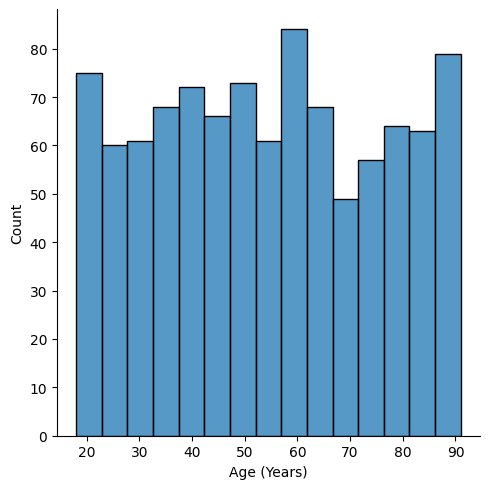

In [17]:
#calculate how many bins would be required for a bin_width of 5 using range/bindwith.
bin_width=5
max_value=max(age)
min_value=min(age)
#calculate the range 
range_value=max_value-min_value
#calculate the bin
bin_value=round(range_value/bin_width)
print(bin_value) #15 bins would be required
age_plot=sns.displot(x=age, bins=15, label='Age')

**Exercise 2b: Univariate plot of Dependents, fixing data errors with seaborn**

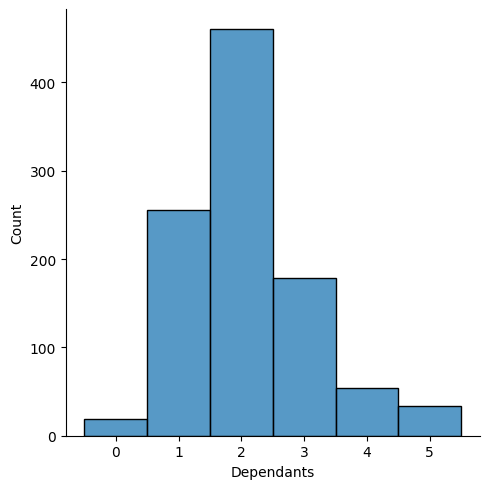

In [18]:
#Fill the Na values with 0 using .fillna()
dependants_filled=acw_df['Dependants'].fillna('0')
#Make the plot using the filled data series
dependant_plot=sns.displot(data=acw_df, x=dependants_filled, label='Dependants')

**Exercise 2c: Univariate plot Age conditioned on Marital Status**

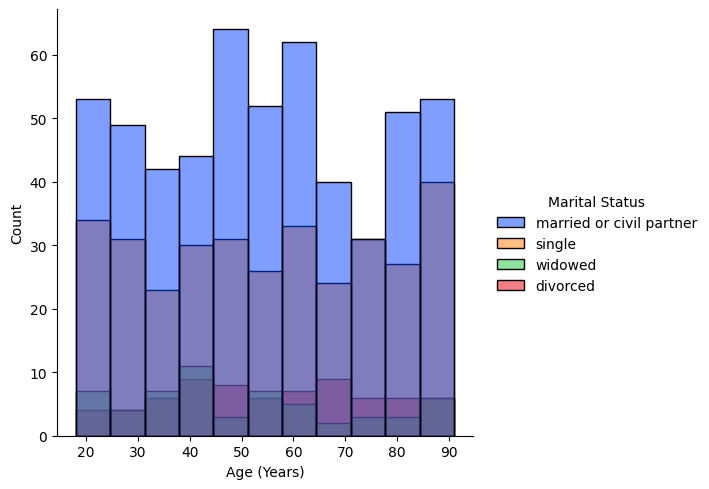

In [19]:
#Intesify the colour scheme to make the plot more visible
distinct_palette = sns.color_palette("bright")[:4] #isolate first four colours in the palette

#Obtain the data series for marital status
marital_status=acw_df['Marital Status']

#Plot the age column 
age_marital_plot=sns.displot(x=age, hue= marital_status, palette=distinct_palette, label='Age and Marital status')

**Exercise 3a: Mulivariate plot of Commuted distance against salary.**

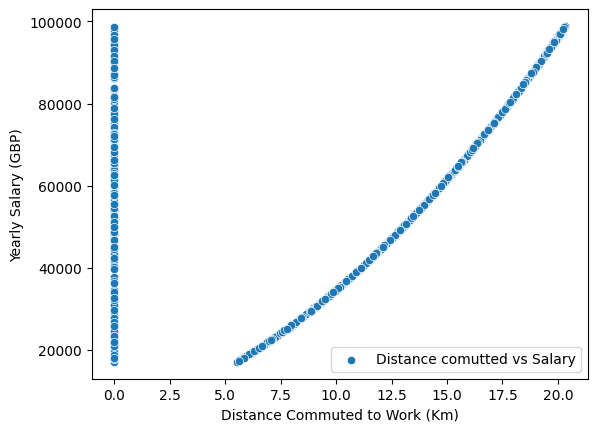

In [20]:
#create a scatter plot of commuted disatnce and Yearly salary
commute_salary_scatterplot=sns.scatterplot(data=acw_df, x='Distance Commuted to Work (Km)', y='Yearly Salary (GBP)', label='Distance comutted vs Salary')

**Exercise 3b: Multivariate plot of Age against Salary**

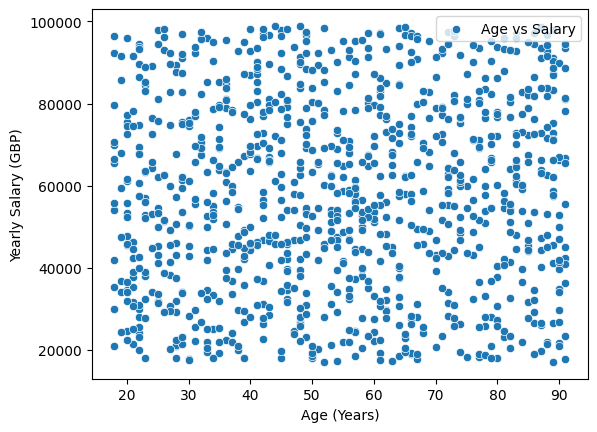

In [21]:
age_salary_scatterplot=sns.scatterplot(data=acw_df, x='Age (Years)', y='Yearly Salary (GBP)', label='Age vs Salary')

**Exercise 3c: Multivariate plot of Age against Salary, conditioned by dependents**

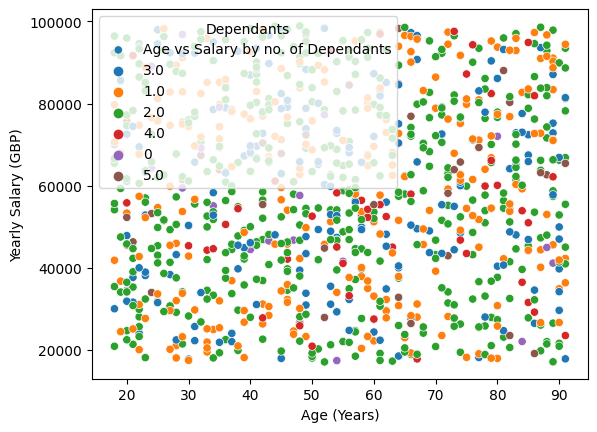

In [22]:
age_salary_dependants_scatterplot=sns.scatterplot(data=acw_df, x='Age (Years)', y='Yearly Salary (GBP)', hue=dependants_filled, label='Age vs Salary by no. of Dependants')

**Exercise 4: Save the plots**

In [23]:
#Save all the plots to files
try:
    age_plot.savefig('./age_plot.png')
    dependant_plot.savefig('./dependant_plot.png')
    age_marital_plot.savefig('./age_marital_plot.png')
    commute_salary_scatterplot.get_figure().savefig('./commute_salary_scatterplot.png')
    age_salary_scatterplot.get_figure().savefig(('./age_salary_scatterplot.png'))
    age_salary_dependants_scatterplot.get_figure().savefig('./age_salary_dependents_scatterplot.png')
except Exception as e:
    print(f"Error saving plots: {e}")